# Water Quality Predictions using Machine Learining Algorithms


### Collection of Data

In [2]:
import pandas as pd                     #to read the data (csv file), to analyse the data and to do exploratory analysis
import numpy as np                      #to work with numerical data, like to get the mean, variance
import matplotlib.pyplot as plt         #for visualization 
import seaborn as sns                   #for visualization

                                       


In [3]:
data=pd.read_csv(r'C:\Users\Yashaswini\OneDrive\Desktop\My Projects\water_potability.csv')



In [4]:
data.head()                             #list the first five rows

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
data.tail()                            #list the last five rows

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [6]:
import plotly.express as px
import pandas as pd

# Load sample data


# Create scatter matrix with all pairs of variables
fig = px.scatter_matrix(data,dimensions=["ph", "Hardness", "Solids", "Chloramines",
                                         "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", 
                                         "Turbidity"], color="Potability", template="plotly_dark")

# Show the plot
fig.show(height=5000, width=800)


C:\Users\Yashaswini\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


<br>

### Cleaning the data

In [6]:
data.shape                                       #Rows*Columns

(3276, 10)

In [7]:
data.info()                                      #to find if the data is having any null values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data.isnull().sum()                               #to find the total null values in each column 


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0, 0.5, 'percentage of null values')

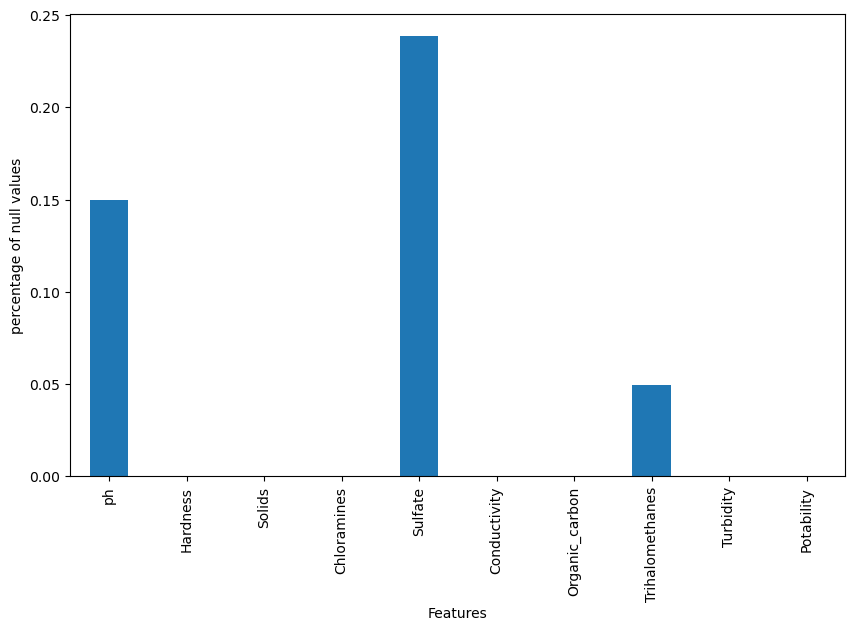

In [9]:
data.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel("percentage of null values")

In [10]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [11]:
data.fillna(data.mean(),inplace=True)                     #to fill all the rows with mean of the data 


In [12]:
data                                                      # data has no NaN values

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [13]:
data.isnull().sum() #data cleaning is done with respect to filling missing values.


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

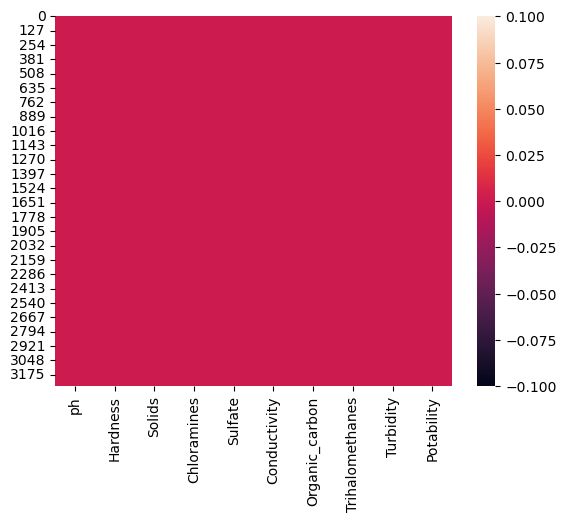

In [14]:
sns.heatmap(data.isnull()) #no null values

In [15]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<br>

<br>

#  Exploratory Data Analyis

### Dimensionality Reduction

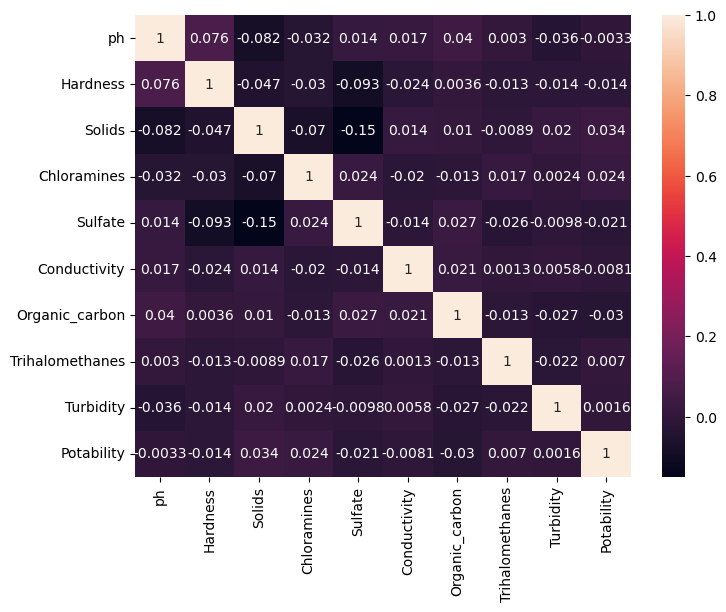

In [16]:
sns.heatmap(data.corr(),annot=True)                #checking the correlation between the data
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()
                                                  #1 represent 100% correlated with the features on X and Y axis
                                                  #If two features are correlating with more that approx 75% we can remove

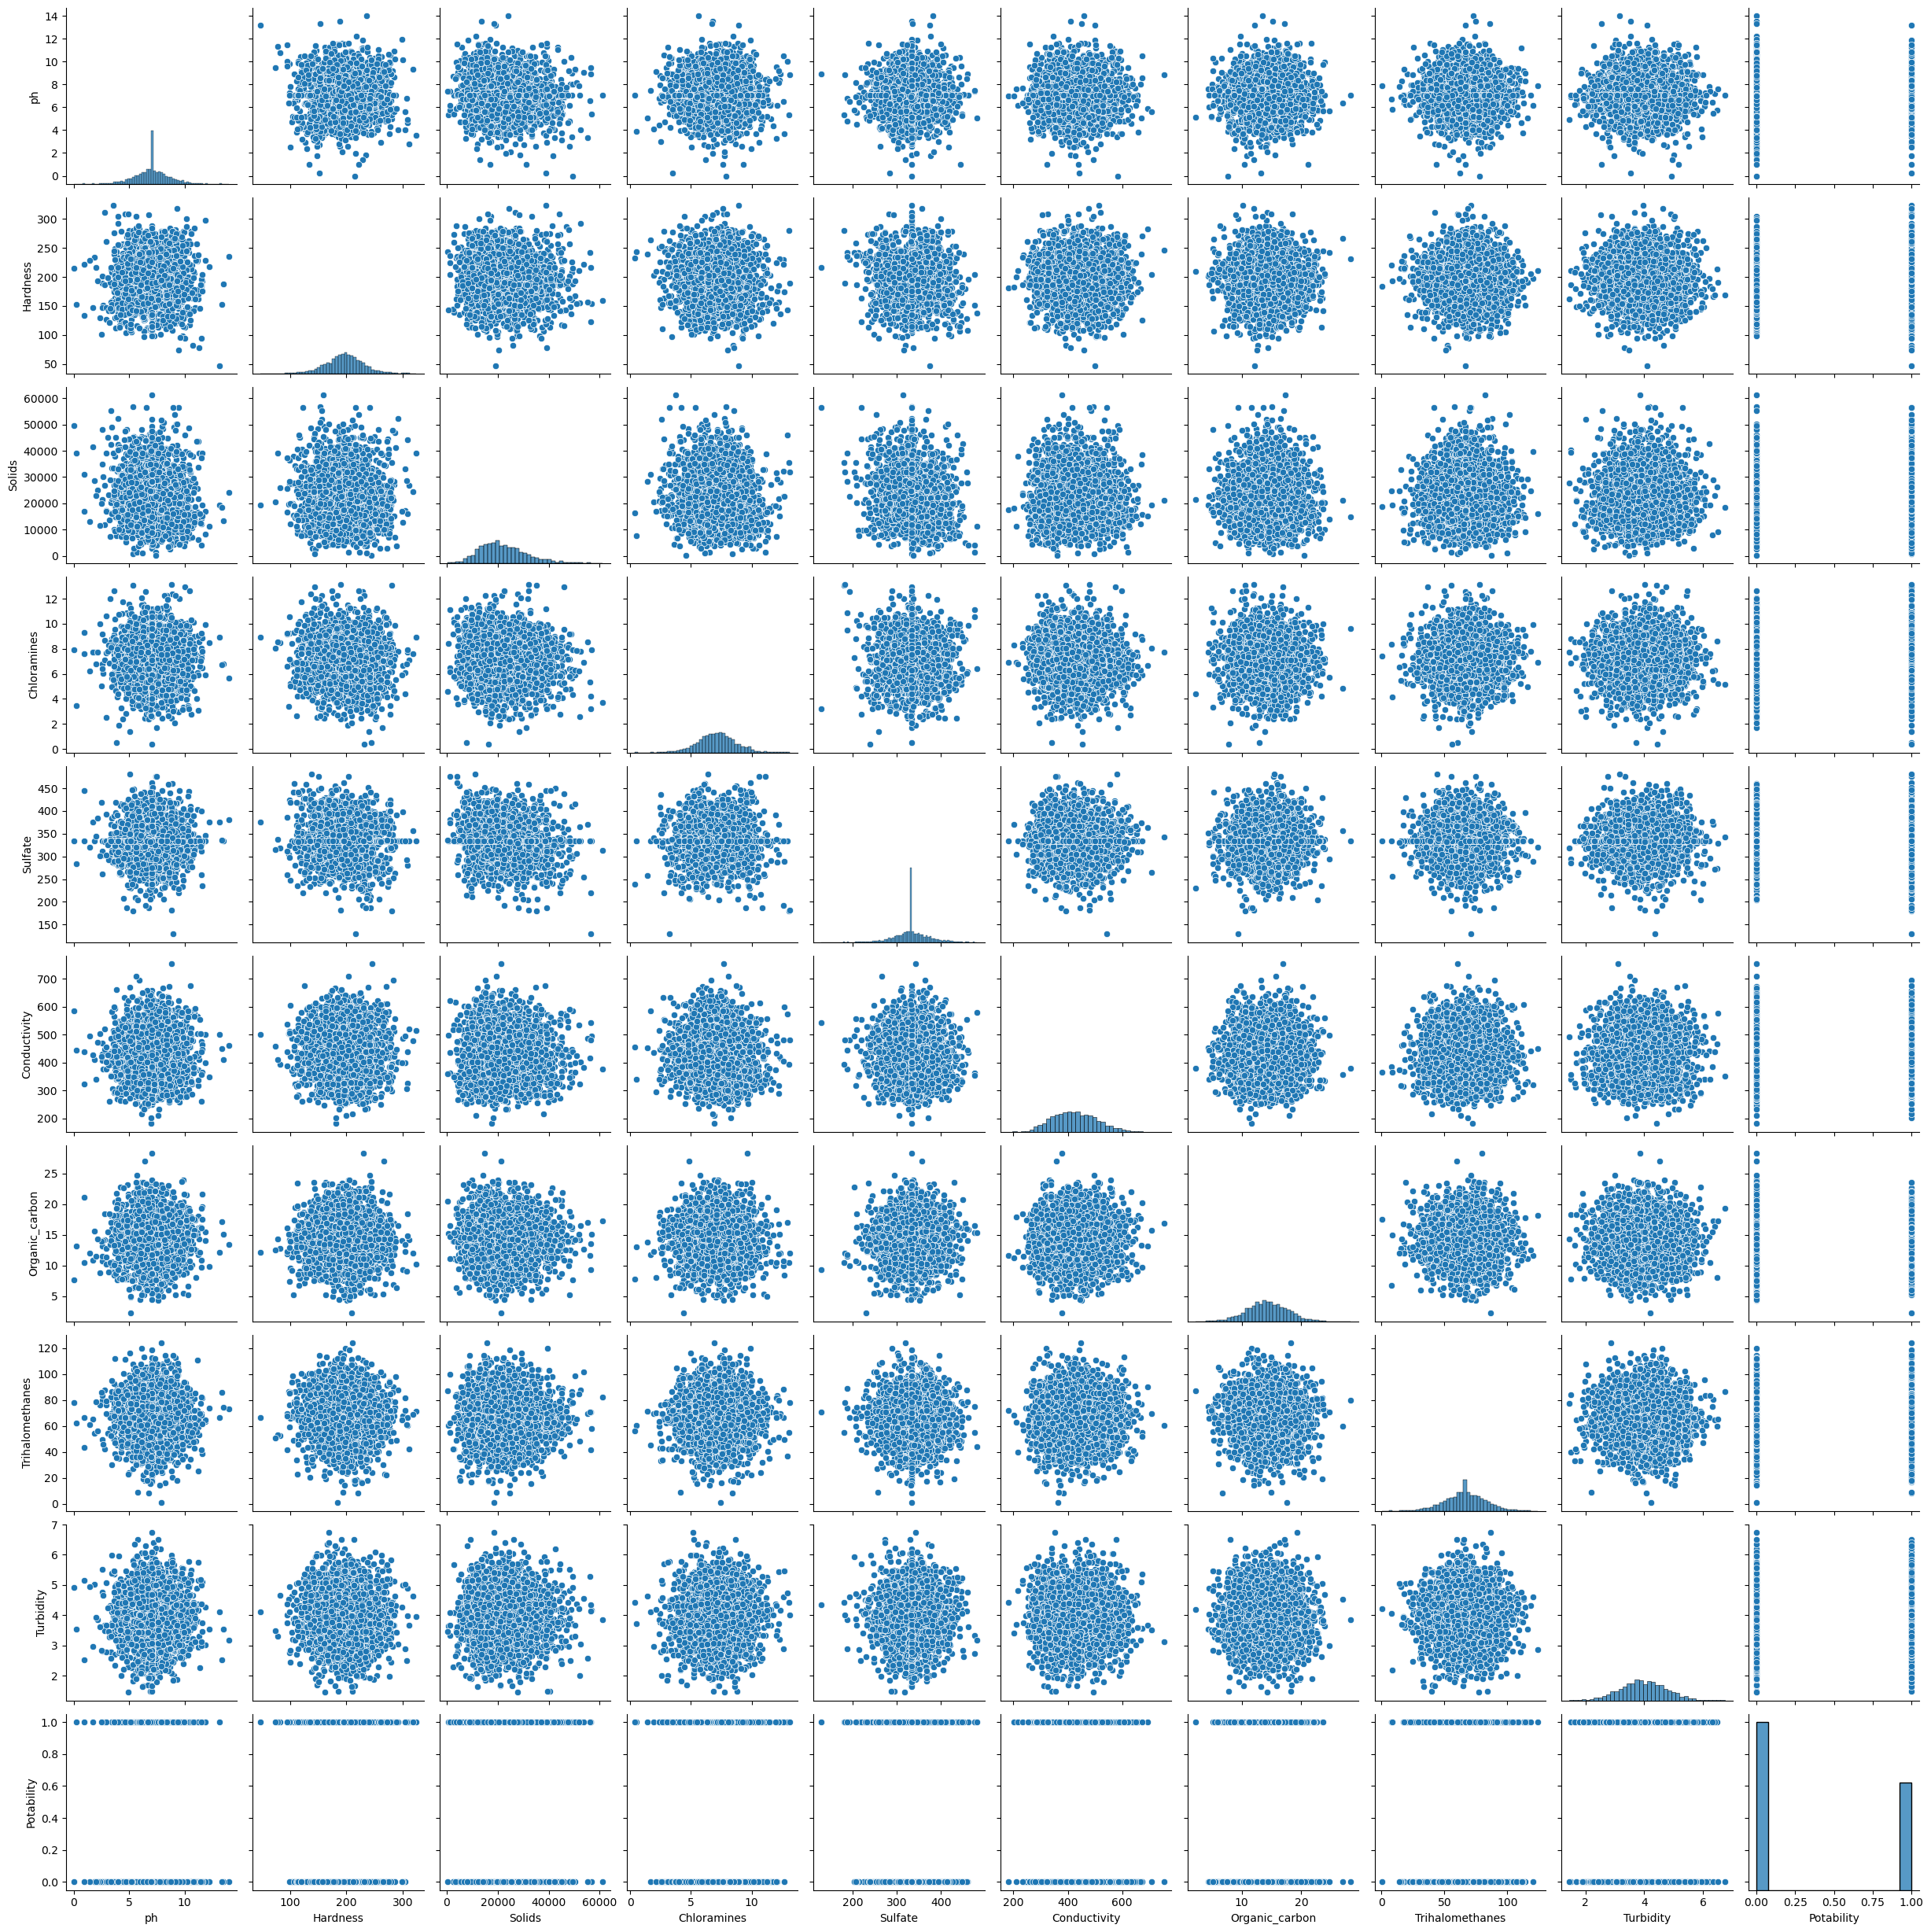

In [17]:
sns.pairplot(data)

<br>

### Checking for outliers

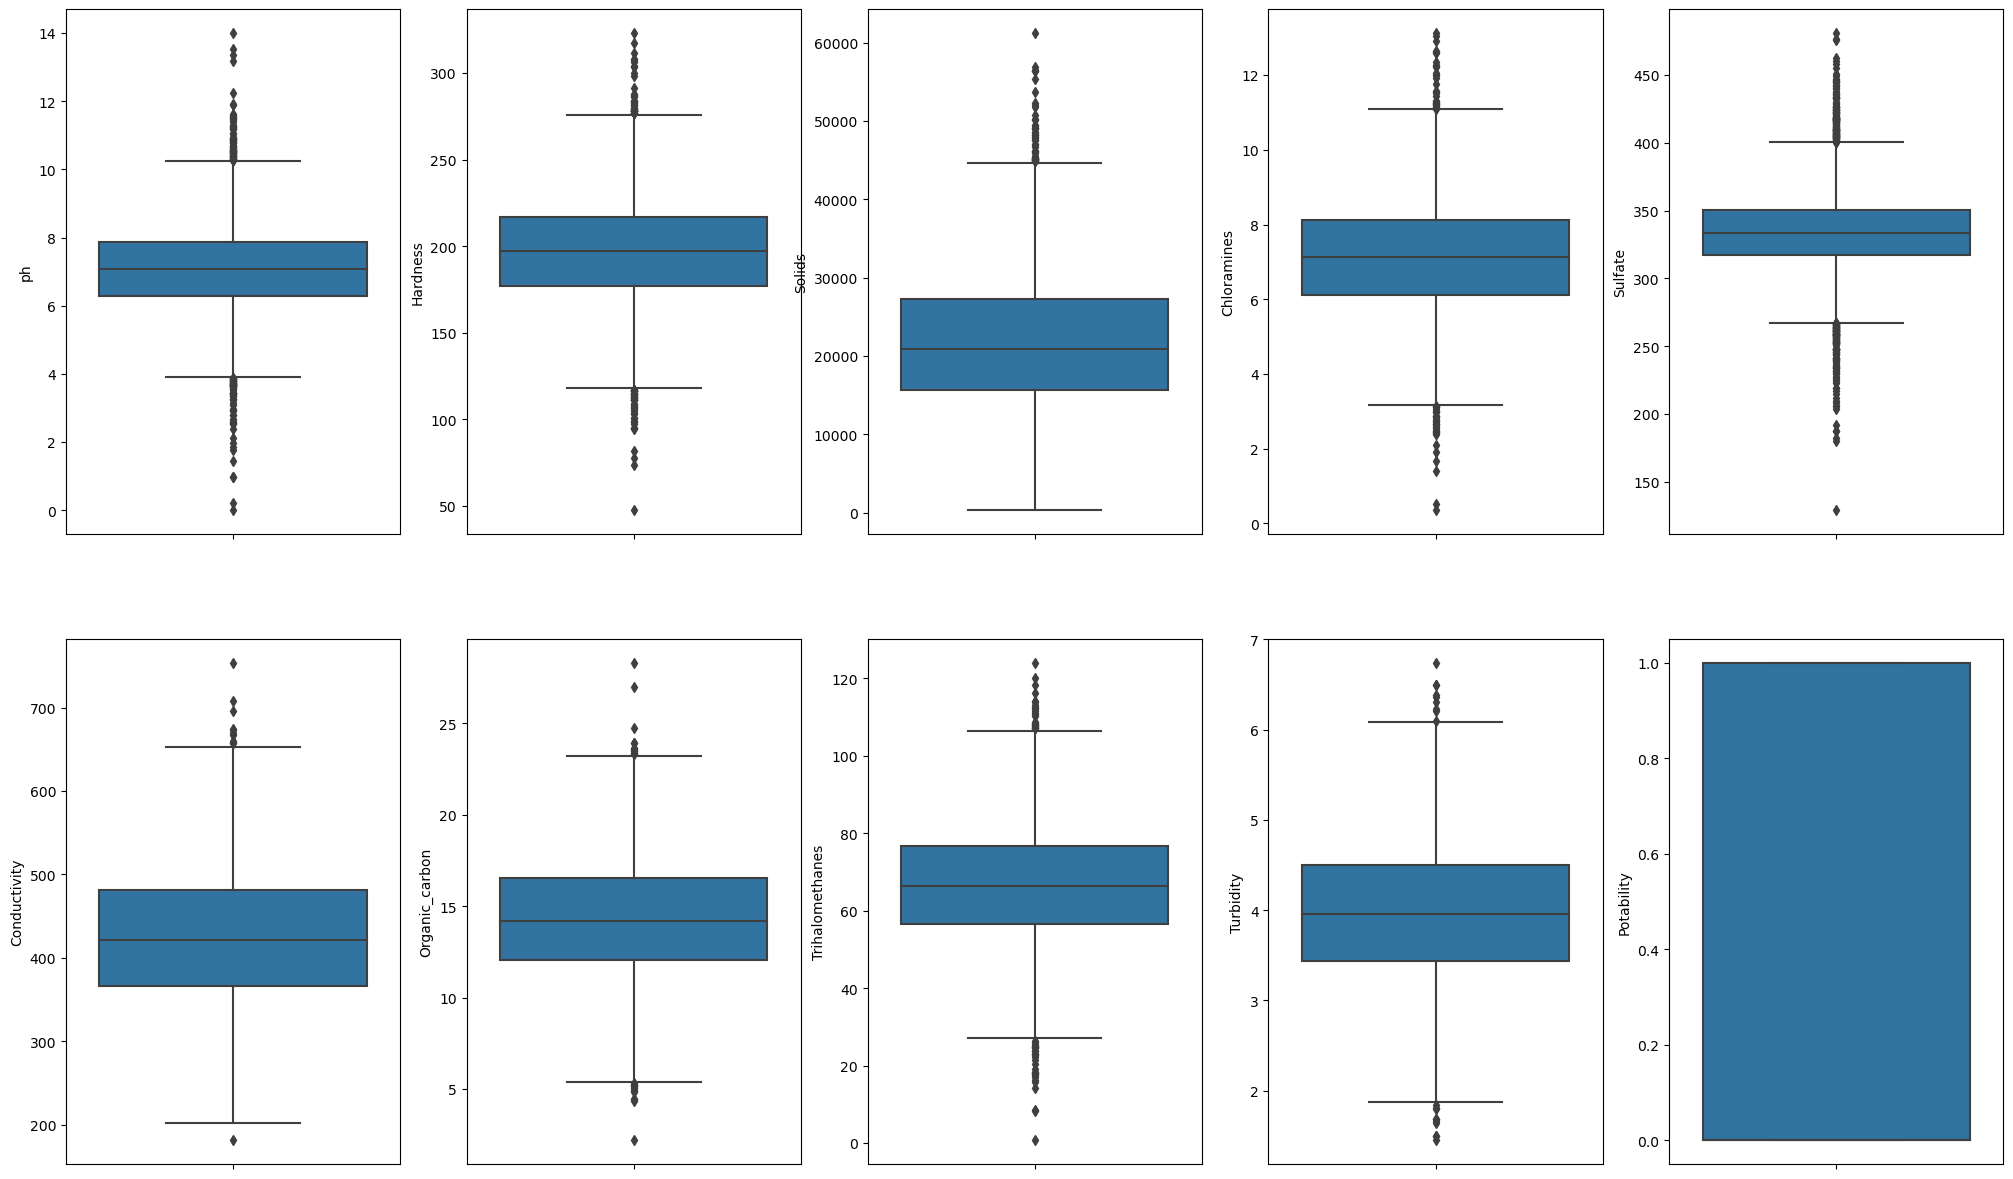

In [18]:
fig,ax =plt.subplots(ncols=5, nrows=2,figsize=(25,15))
ax=ax.flatten()                                             #make the plot 2D to 1D
index=0
for col,value in data.items():
    sns.boxplot(y=col,data=data,ax=ax[index])
    index+=1

<br>

### Checking for balance of the data

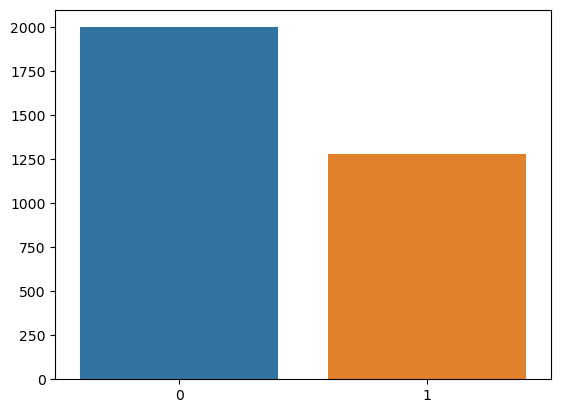

In [19]:
sns.barplot(x=data['Potability'].value_counts().index, y = data['Potability'].value_counts().values)
plt.show()

In [20]:
from imblearn.over_sampling import SMOTE

X1 = data.loc[:, data.columns != 'Potability']
Y1 = data.Potability


smote = SMOTE(k_neighbors=3, random_state=1234)
resam_X1,resam_Y1 = smote.fit_resample(X1, Y1)


data = pd.concat([pd.DataFrame(resam_X1), pd.DataFrame(resam_Y1)], axis=1)


print(data['Potability'].value_counts())


0    1998
1    1998
Name: Potability, dtype: int64


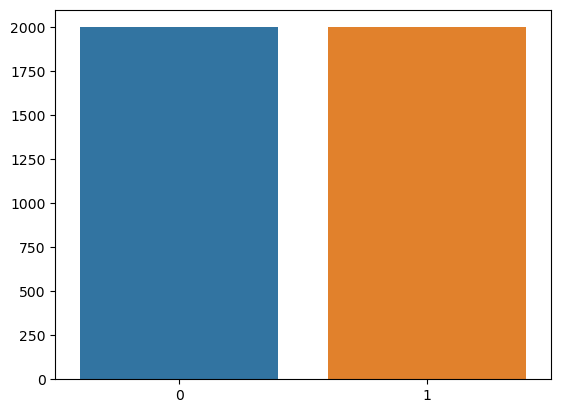

In [21]:
sns.barplot(x=data['Potability'].value_counts().index, y = data['Potability'].value_counts().values)
plt.show()

### Normality 

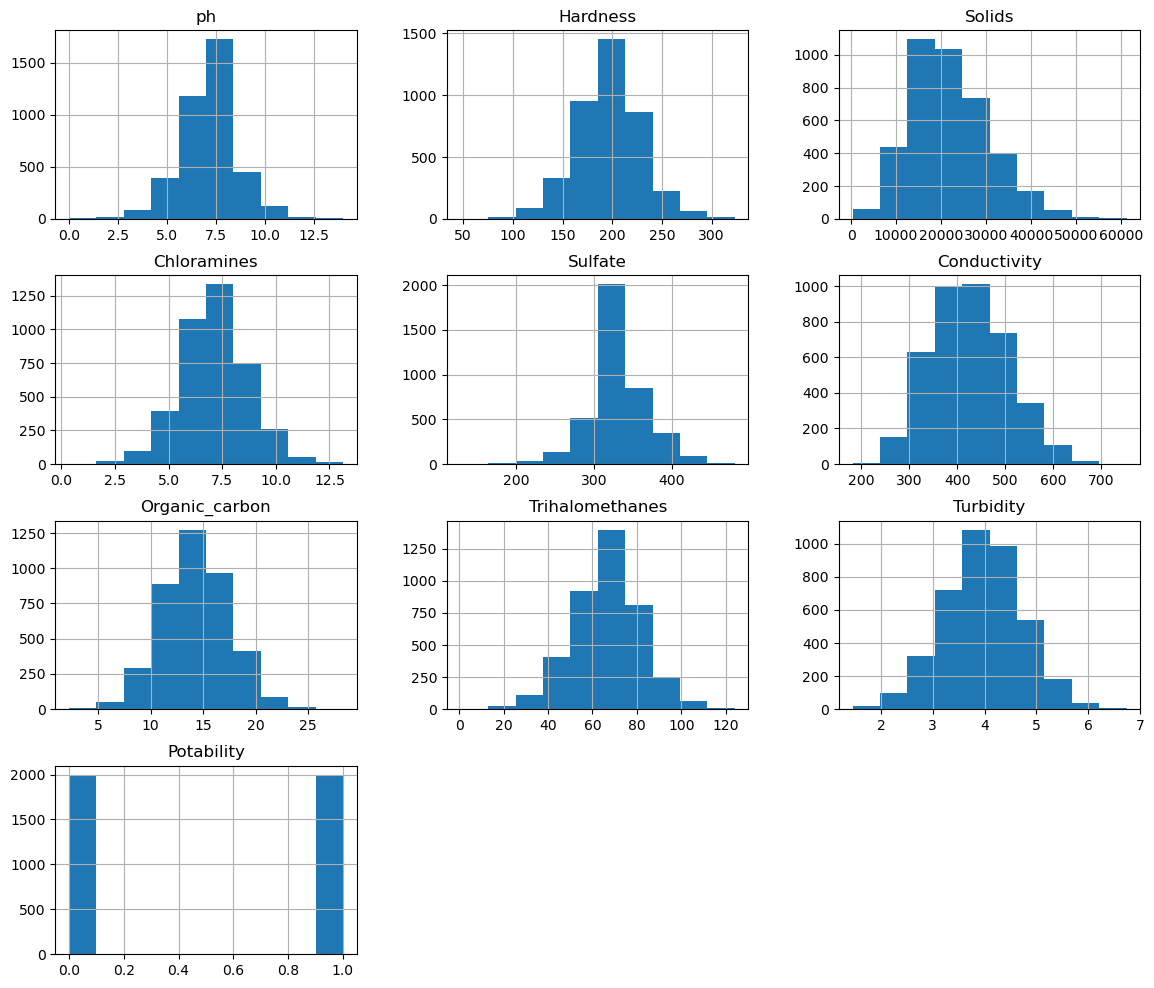

In [22]:
data.hist(figsize=(14,12)) #to check normality i.e. how is the data distributed
plt.show()

### we can use Scaling as a method of normalization


<br>

### Partitioning the data

In [23]:
X=data.drop('Potability',axis=1)                               #input data

In [24]:
Y=data['Potability']                                           #target Variable

In [25]:
from sklearn.model_selection import train_test_split             
#to split the data
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()                                        #scale everything with the mean and standard deviation
# X=scaler.fit_transform(X)                                      #fit calculates the sd and mean and transform to every columnns


In [26]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y ,test_size=0.3,shuffle=True, random_state= 101)

#test_size is 30% of the data
#random_state has a seed value of 3900 which means everytime we check for X_Train same data is displayed under that value

In [27]:
X
                                                                #here everything is in the range, 
                                                                #i.e. for the first column you have 2 
                                                                #and for the second column you have 50000

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  5.227686  127.309494   7907.484783     6.764230  335.458993   
3992  7.116789  188.062182  21984.973238     7.184030  347.197657   
3993  7.312660  231.576239  21699.397370     8.628801  321.013701   
3994  7.709351  207.643534  17798.960751     6.961931  309.574051   
3995  6.941672  183.737993  25624.303367     7.358627  318.932849   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3991    475.335256       12.729630        79.402230   5.135914  
3992    391.439179       12.538119        80.234086   4.010436  
3993    497.801371       17.257146        49.728843   4.197113  
3994    374.818491       17.310715        36.810483   3.874634  
3995    300.869972       13.368794        89.852010   4.564729  

[3996 rows x 9 columns]

In [28]:
X_train

ph    Hardness        Solids  Chloramines     Sulfate  \
3737  9.433937  137.053498  20680.798078     9.081146  296.944818   
374   8.882684  135.523062   4857.253807     5.209779  333.775777   
1893  7.559852  244.294558  29567.698929     8.647880  333.775777   
2525  5.692124  165.906280  22396.209254     6.682692  309.121602   
704   6.144759  210.979747  19981.315188     9.203614  271.097104   
...        ...         ...           ...          ...         ...   
1599  8.227083  274.351887  40546.956332     7.130161  241.446917   
3910  7.916273  221.794601  29023.775509     7.619919  334.178642   
1361  4.906492  173.779159  14786.138901     5.843757  267.561144   
1547  6.217585  203.707222  15597.640883     7.751461  361.247810   
863   7.685397  230.335708   7324.701425     7.991366  331.512533   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3737    433.952322       11.607525        79.659853   2.921480  
374     532.336659       20.296274        20.337753   3.827921  
1893    278.475586       10.046943       107.610806   4.550501  
2525    530.072520       11.472016        66.396293   4.682391  
704     332.598126       17.187963        79.634242   3.082080  
...            ...             ...              ...        ...  
1599    417.673702        9.809669        79.397105   3.619182  
3910    410.764131       15.374947        65.600387   3.641209  
1361    620.346840        7.775896        38.794307   3.152345  
1547    452.922025       14.597145        70.850977   4.150167  
863     492.850391       14.233952        74.068658   4.179187  

[2797 rows x 9 columns]

In [29]:
Y_train

3737    1
374     1
1893    1
2525    0
704     1
       ..
1599    1
3910    1
1361    0
1547    1
863     0
Name: Potability, Length: 2797, dtype: int64

In [30]:
X_test


ph    Hardness        Solids  Chloramines     Sulfate  \
1346  5.588537  171.333123  17732.240668     5.588614  343.041575   
1046  6.733494  197.562665  27430.441731     6.035087  303.937670   
3336  7.961092  183.274930  32551.785343     7.773802  315.157756   
2801  4.855588  145.790370  14905.255912     9.829675  392.667482   
3201  5.530055  207.998220  38918.778073     6.543134  360.070715   
...        ...         ...           ...          ...         ...   
2061  5.294195  234.271399  26811.203068     3.611358  369.608465   
482   7.705711  178.922858  18476.619166     8.226228  334.889911   
50    7.080795  168.388431  27492.307307     7.046225  299.820478   
579   7.080795  220.976049  11562.435510     6.033392  359.186901   
2129  7.080795  200.839894  20743.348404     6.905988  264.643533   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1346    466.445429       13.827755        59.376451   4.373999  
1046    397.684986       19.394027        54.510725   3.178004  
3336    384.190376       11.801552        64.187728   4.237924  
2801    459.288037       10.446590        52.289484   4.697153  
3201    427.664302       18.813080        61.214979   3.327472  
...            ...             ...              ...        ...  
2061    570.975027       12.775773        44.675683   3.522454  
482     518.043369       10.638798        63.157489   3.861956  
50      383.795020       16.182066        75.729434   3.048057  
579     406.466385       14.149317        59.373218   4.589162  
2129    450.361720       10.209153        70.495602   3.808913  

[1199 rows x 9 columns]

In [31]:
Y_test

1346    0
1046    0
3336    1
2801    1
3201    1
       ..
2061    0
482     0
50      0
579     0
2129    0
Name: Potability, Length: 1199, dtype: int64

<br><br>

## Model Training

### Logistic Regression ML Algorithm

In [32]:
from sklearn.linear_model import LogisticRegression                  #importing Logistic Regression
                                                                     #it is used when dealing with binary attributes

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#object creation
model_lr=LogisticRegression()

In [33]:
#Training the model

model_lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
predict_lr=model_lr.predict(X_test)

In [35]:
accuracy_lr=accuracy_score(Y_test,predict_lr)*100
accuracy_lr

51.29274395329442

In [36]:
confusion_matrix(Y_test,predict_lr)

array([[443, 151],
       [433, 172]], dtype=int64)

<br>

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(X_train,Y_train)   #Train Model


RandomForestClassifier()

In [38]:
#Making Prediction
pred_rf=model_rf.predict(X_test)
accuracy_rm=accuracy_score(Y_test,pred_rf)*100
accuracy_rm


71.22602168473729

In [39]:
confusion_matrix(Y_test,pred_rf)

array([[434, 160],
       [185, 420]], dtype=int64)

<br><br>

### K-Nearest Neighbour Algorithm 

In [40]:
from sklearn.neighbors import KNeighborsClassifier



for i in range(4,15):                                #for each neighbor check the accuracy
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,Y_train)
    pred_knn=model_knn.predict(X_test)
    accuracy_score_knn=accuracy_score(Y_test,pred_knn)
    print(i,accuracy_score_knn)

4 0.5713094245204337
5 0.5713094245204337
6 0.5537948290241869
7 0.5646371976647206
8 0.5579649708090075
9 0.554628857381151
10 0.5479566305254379
11 0.5446205170975813
12 0.5412844036697247
13 0.5379482902418682
14 0.5396163469557965


In [76]:
model_knn=KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train,Y_train)
pred_knn=model_knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,pred_knn)
print(accuracy_knn*100)

57.130942452043364


<br><br>

### Support Vector Machine ML Algorithm

In [42]:
from sklearn.svm import SVC

model_svm= SVC(kernel='rbf') #parameters can be rbf, linear, circle, polynomial
                             #this  is like hyperparameter tuning
    
#Model Training
model_svm.fit(X_train,Y_train)

SVC()

In [43]:
pred_svm=model_svm.predict(X_test)

In [44]:
accuracy_svm=accuracy_score(Y_test,pred_svm)*100
accuracy_svm

50.95913261050876

<br><br>

### AdaBoostClassifier ML Algorithm

In [45]:
from sklearn.ensemble import AdaBoostClassifier


model_ada=AdaBoostClassifier(n_estimators=300,learning_rate=0.05) #first used is 100 and learning rate was not set: """out=60%"""

model_ada.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=300)

In [46]:
#Prediction

pred_ada=model_ada.predict(X_test)
accuracy_ada=accuracy_score(Y_test, pred_ada)*100
accuracy_ada

56.46371976647207

<br><br>

### XGBooST ML on Water Quality Predciton

In [47]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier




In [48]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred_xgb=model_xgb.predict(X_test)
accuracy_xgb=accuracy_score(Y_test,pred_xgb)*100
accuracy_xgb

67.22268557130943

<br><br>

### Deciscion Tree 

In [50]:
from sklearn.tree import DecisionTreeClassifier             #call the library
dt=DecisionTreeClassifier()                                 #store it in some variable
                                                            #decision tree makes the branch like if ph>7 yes/no, if yes 
                                                            #it checks for hardness>somevalue yes/no and so on and so forth

In [51]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [52]:
Y_Prediction=dt.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
accuracy_dt=accuracy_score(Y_Prediction,Y_test)*100 #comparing the ground result and the prediction
accuracy_dt

61.30108423686406

In [55]:
#Confusion matrix
#[[TruePositive: prediction matching with the truth value (drinkable water),FalsePositive:truth:water is bad:prediction:good ]
#[FalseNegative: truth:good,prediction:bad ,True Negative: prediction matching with the truth value(not-drinkable water)]]
confusion_matrix(Y_Prediction,Y_test)

array([[365, 235],
       [229, 370]], dtype=int64)

<br><br>

### Accuracy Result


In [56]:
models=pd.DataFrame({
    "Model":["Logistic Regression", "Random Forest", "KNN", "SVM", "AdaBoost","XGBoost","Decision Tree"],
    "Accuracy_Score":[accuracy_lr, accuracy_rm, accuracy_knn, accuracy_svm, accuracy_ada, accuracy_xgb, accuracy_dt]
})

In [57]:
models

Model  Accuracy_Score
0  Logistic Regression       51.292744
1        Random Forest       71.226022
2                  KNN        0.557965
3                  SVM       50.959133
4             AdaBoost       56.463720
5              XGBoost       67.222686
6        Decision Tree       61.301084

<Axes: xlabel='Accuracy_Score', ylabel='Model'>

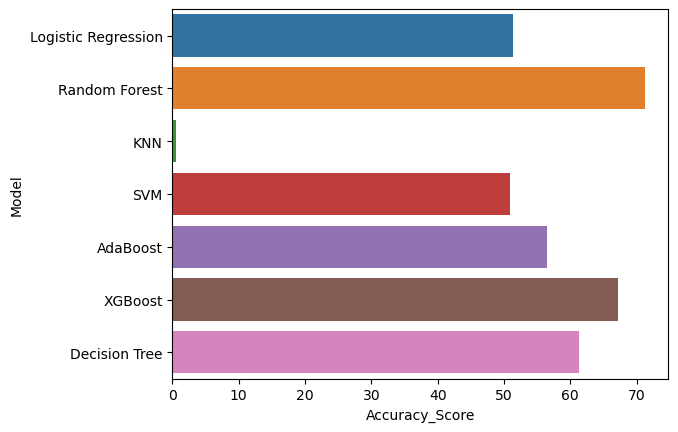

In [58]:
import pandas as pd
import seaborn as sns



# Create the bar plot
sns.barplot(x="Accuracy_Score", y="Model", data=models)

<br><br>

## Optimization

In [59]:
n_estimators=[20,60,100,120]
max_features=[0,2,0,6,1,0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

In [60]:
param_grid={'n_estimators':n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'max_samples': max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0, 2, 0, 6, 1, 0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [61]:
rf=RandomForestClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

In [63]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Yashaswi

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0, 2, 0, 6, 1, 0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [64]:
rf_grid.best_params_

{'max_depth': None, 'max_features': 6, 'max_samples': 1.0, 'n_estimators': 60}

In [65]:
rf_grid.best_score_

0.6728775875287504

<br><br>


## Outlier removal

In [66]:
def cap_data(data):
    for col in data.columns:
        print("\n\n capping the \n",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            
            q1=data[col].quantile(0.25)
            q3=data[col].quantile(0.75)
            iqr=q3-q1
            lower,upper=(q1-(iqr*1.5)),(q3+(iqr*1.5))    
            print("q1=",q1,"q3=",q3,"iqr=",iqr,"lower=",lower,"upper=",upper) 
            data[col][data[col] <= lower] = lower
            data[col][data[col] >= upper] = upper
            print("\n",data[col][data[col] <= lower] )
            print("\n",data[col][data[col] >= upper] )
            
        else:
            data[col]=data[col]
    return data

final_df=cap_data(data)



 capping the 
 ph
q1= 6.323716632945883 q3= 7.824053938069605 iqr= 1.5003373051237219 lower= 4.073210675260301 upper= 10.074559895755188

 1       4.073211
23      4.073211
26      4.073211
36      4.073211
60      4.073211
          ...   
3261    4.073211
3376    4.073211
3509    4.073211
3643    4.073211
3650    4.073211
Name: ph, Length: 90, dtype: float64

 6       10.07456
9       10.07456
32      10.07456
47      10.07456
54      10.07456
          ...   
3269    10.07456
3290    10.07456
3351    10.07456
3383    10.07456
3837    10.07456
Name: ph, Length: 99, dtype: float64


 capping the 
 Hardness
q1= 177.21084634749081 q3= 216.57664519473482 iqr= 39.36579884724401 lower= 118.1621480766248 upper= 275.62534346560085

 32      118.162148
51      118.162148
67      118.162148
71      118.162148
149     118.162148
189     118.162148
215     118.162148
227     118.162148
246     118.162148
258     118.162148
263     118.162148
278     118.162148
309     118.162148
317     118.16

C:\Users\Yashaswini\AppData\Local\Temp\ipykernel_11060\4202190473.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yashaswini\AppData\Local\Temp\ipykernel_11060\4202190473.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yashaswini\AppData\Local\Temp\ipykernel_11060\4202190473.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yashaswini\AppData\Local\Temp\ipykernel_11060\4202190473.py:12: SettingWi

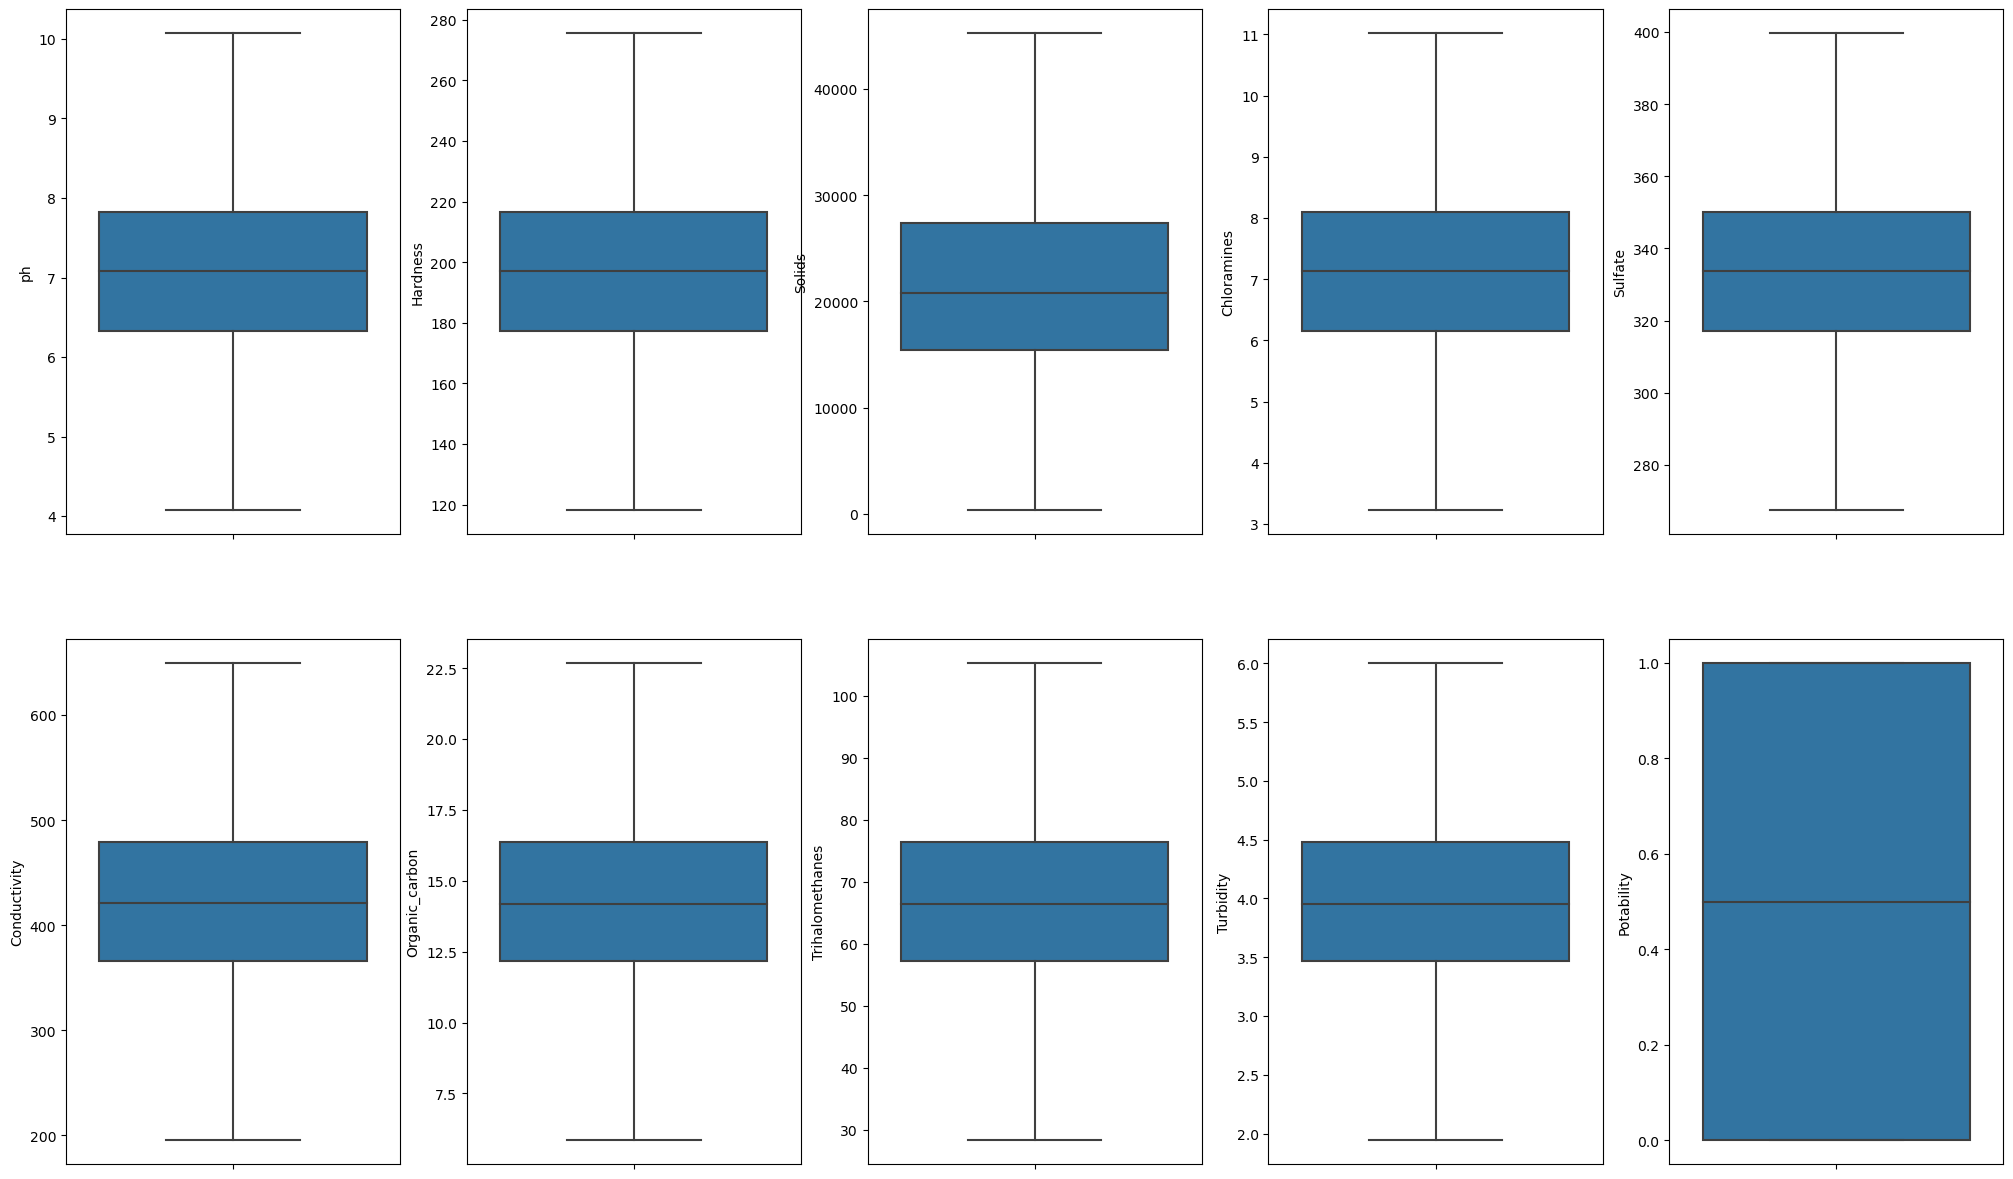

In [67]:
fig,ax =plt.subplots(ncols=5, nrows=2,figsize=(25,15))
ax=ax.flatten()                                             #make the plot 2D to 1D
index=0
for col,value in data.items():
    sns.boxplot(y=col,data=data,ax=ax[index])
    index+=1

In [68]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(X_train,Y_train)   #Train Model

RandomForestClassifier()

In [69]:
#Making Prediction
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred_rf=model_rf.predict(X_test)
accuracy_rm=accuracy_score(Y_test,pred_rf)*100
accuracy_rm

69.47456213511259

<br><br>

## Output

In [72]:
X_test

ph    Hardness        Solids  Chloramines     Sulfate  \
1346  5.588537  171.333123  17732.240668     5.588614  343.041575   
1046  6.733494  197.562665  27430.441731     6.035087  303.937670   
3336  7.961092  183.274930  32551.785343     7.773802  315.157756   
2801  4.855588  145.790370  14905.255912     9.829675  392.667482   
3201  5.530055  207.998220  38918.778073     6.543134  360.070715   
...        ...         ...           ...          ...         ...   
2061  5.294195  234.271399  26811.203068     3.611358  369.608465   
482   7.705711  178.922858  18476.619166     8.226228  334.889911   
50    7.080795  168.388431  27492.307307     7.046225  299.820478   
579   7.080795  220.976049  11562.435510     6.033392  359.186901   
2129  7.080795  200.839894  20743.348404     6.905988  264.643533   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1346    466.445429       13.827755        59.376451   4.373999  
1046    397.684986       19.394027        54.510725   3.178004  
3336    384.190376       11.801552        64.187728   4.237924  
2801    459.288037       10.446590        52.289484   4.697153  
3201    427.664302       18.813080        61.214979   3.327472  
...            ...             ...              ...        ...  
2061    570.975027       12.775773        44.675683   3.522454  
482     518.043369       10.638798        63.157489   3.861956  
50      383.795020       16.182066        75.729434   3.048057  
579     406.466385       14.149317        59.373218   4.589162  
2129    450.361720       10.209153        70.495602   3.808913  

[1199 rows x 9 columns]

In [73]:
Y_test

1346    0
1046    0
3336    1
2801    1
3201    1
       ..
2061    0
482     0
50      0
579     0
2129    0
Name: Potability, Length: 1199, dtype: int64

In [74]:
import numpy as np

X_new1=np.array([5.588537,171.333123,17732.240668,5.588614,343.041575,466.445429,13.827755,59.376451,4.373999])
X_new1 = X_new1.reshape(1, -1)
y_pred1 = model_rf.predict(X_new1)
print("array 1346: ",y_pred1)

X_new2=np.array([6.733494,197.562665,27430.441731,6.035087,303.937670,397.684986,19.394027,54.510725,3.178004])
X_new2 = X_new2.reshape(1, -1)
y_pred2 = model_rf.predict(X_new2)
print("array 1046: ",y_pred2)

X_new3=np.array([7.961092,183.274930,32551.785343,7.773802,315.157756,384.190376,11.801552,64.187728,4.237924])
X_new3 = X_new3.reshape(1, -1)
y_pred3 = model_rf.predict(X_new3)
print("array 3336: ",y_pred3)

X_new4=np.array([4.855588,145.790370,14905.255912,9.829675,392.667482,59.288037,10.446590,52.289484,4.697153])
X_new4 = X_new4.reshape(1, -1)
y_pred4 = model_rf.predict(X_new4)
print("array 2801: ",y_pred4)

X_new5=np.array([5.530055,207.998220,38918.778073,6.543134,360.070715,427.664302,18.813080,61.214979,3.327472])
X_new5 = X_new5.reshape(1, -1)
y_pred5 = model_rf.predict(X_new5)
print("array 3201: ", y_pred5)

X_new6=np.array([5.294195,234.271399,26811.203068,3.611358,369.608465,570.975027,12.775773,44.675683,3.522454])
X_new6 = X_new6.reshape(1, -1)
y_pred6 = model_rf.predict(X_new6)
print("array 2061: ",y_pred6)

X_new7=np.array([7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956])
X_new7 = X_new7.reshape(1, -1)
y_pred7 = model_rf.predict(X_new7)
print("array 482:  ",y_pred7)

X_new8=np.array([7.080795,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057])
X_new8 = X_new8.reshape(1, -1)
y_pred8 = model_rf.predict(X_new8)
print("array 50:   ",y_pred8)

X_new9=np.array([7.080795,220.976049,11562.435510,6.033392,359.186901,406.466385,14.149317,59.373218,4.589162])
X_new9 = X_new9.reshape(1, -1)
y_pred9 = model_rf.predict(X_new9)
print("array 579:  ",y_pred9)

X_new10=np.array([7.080795,200.839894,20743.348404,6.905988,264.643533,450.361720,10.209153,70.495602,3.808913])
X_new10 = X_new2.reshape(1, -1)
y_pred10 = model_rf.predict(X_new10)
print("array 2129: ",y_pred10)




array 1346:  [0]
array 1046:  [1]
array 3336:  [1]
array 2801:  [1]
array 3201:  [0]
array 2061:  [1]
array 482:   [1]
array 50:    [1]
array 579:   [1]
array 2129:  [1]


C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\Yashaswini\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid featu

In [75]:
# input features
ph = 5.588537
hardness = 171.333123
solids =17732.240668
chloramines = 5.588614
sulfate =343.041575
conductivity = 466.445429
organic_carbon = 13.827755
trihalomethanes = 59.376451
turbidity =4.373999

data_array=[6.733494,197.562665,27430.441731,6.035087,303.937670,397.684986,19.394027,54.510725,3.178004]
# check if water is potable

potability=1;
if data_array[0] < 6.5 or data_array[1] > 8.5:
    print("The water is not potable because pH is outside the recommended range (6.5-8.5)")
    potability=0;
if data_array[1] > 250:
    print("The water is not potable because hardness is above the recommended limit (250)")
    potability=0;
if data_array[2] > 1000:
    print("The water is not potable because total dissolved solids is above the maximum limit (1000)")
    potability=0;
if data_array[3]> 4:
    print("The water is not potable because chloramines is above the recommended limit (4)")
    potability=0;
if data_array[4] > 250:
    print("The water is not potable because sulfate is above the recommended limit (250)")
    potability=0;
if data_array[5] > 400:
    print("The water is not potable because conductivity is above the recommended limit (400)")
    potability=0;
if data_array[6] > 2:
    print("The water is not potable because organic carbon is above the recommended limit (2)")
    potability=0;
if data_array[7] > 80:
    print("The water is not potable because trihalomethanes is above the recommended limit (80)")
    potability=0;
if data_array[8] > 5:
    print("The water is not potable because turbidity is above the recommended limit (5)")
    potability=0;
if potability==1:
    print("Otherwise the water is potable")


The water is not potable because pH is outside the recommended range (6.5-8.5)
The water is not potable because total dissolved solids is above the maximum limit (1000)
The water is not potable because chloramines is above the recommended limit (4)
The water is not potable because sulfate is above the recommended limit (250)
The water is not potable because organic carbon is above the recommended limit (2)


In [78]:
from scipy.stats import zscore

# Calculate z-scores for each feature in X_train
X_train_zscored = X_train.apply(zscore)

# Train the model using the z-scored dataset
model_rf.fit(X_train_zscored, Y_train)

# Apply the same z-score transformation to X_test
X_test_zscored = X_test.apply(zscore)

# Make predictions on the z-scored test dataset
pred_rf_zscored = model_rf.predict(X_test_zscored)

# Calculate accuracy of the model on the z-scored test dataset
accuracy_rm_zscored = accuracy_score(Y_test, pred_rf_zscored) * 100
accuracy_rm_zscored


70.22518765638031

In [81]:
from sklearn.metrics import f1_score

# Train the model
model_rf.fit(X_train, Y_train)

# Make predictions
pred_rf = model_rf.predict(X_test)

# Calculate accuracy and F1 score of the model on the test set
accuracy_rm = accuracy_score(Y_test, pred_rf) * 100
f1_rm = f1_score(Y_test, pred_rf)

print("Accuracy: {:.2f}%".format(accuracy_rm))
print("F1 score: {:.2f}".format(f1_rm))


Accuracy: 69.56%
F1 score: 0.69
